In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import lutorpy as lua

In [2]:
def compute_eer(path):
    raw = torch.load(path)
    data = raw.asNumpyArray()
    data_sorted = sorted(data, key=lambda x: x[0])
    preds = np.array([x[1] for x in data_sorted]).astype('int32')
    pairs = [(0.0, 0.0)]
    nPos = np.sum(preds)
    nNeg = len(preds) - nPos
    fp = 0
    tp = 0
    for d in preds:
        if d == 1:
            tp += 1
        else:
            fp += 1
        pairs.append((fp, tp))
    pairs = np.array(pairs) / np.array([[nNeg, nPos]], dtype='float32')
    idx = np.argmin(np.abs(1-pairs[:, 0] - pairs[:, 1]))
    return 1- pairs[idx][0]

In [3]:
flist = ['face'+str(i) for i in range(2, 32)] + ['float']
eers = []
for f in flist:
    path = '/home/chenxi/experiments/torch-playground/exp/{}/log.t7'.format(f)
    eer = compute_eer(path)
    eers.append(eer)

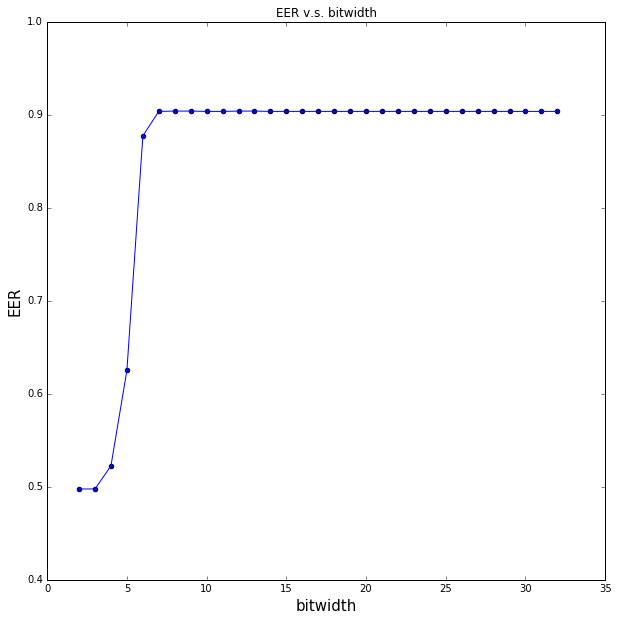

In [5]:
x = list(range(2, 33))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(x, eers)
ax.scatter(x, eers)
ax.set_xlabel('bitwidth', fontsize=15)
ax.set_ylabel('EER', fontsize=15)
ax.set_title('EER v.s. bitwidth')
plt.savefig('out.jpg')